In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-21.08842353325859, -70.15375903285464),
 (73.55573380069174, -64.22644564722789),
 (56.13601089061274, -148.35902311614436),
 (-34.642622282675696, -175.4127182009563),
 (-56.72333951873888, -66.43816137992518),
 (-40.69131295960354, -19.5735324546132),
 (-83.30944586097952, -29.84874115605774),
 (66.38415702315314, -97.30770853058232),
 (-20.374685842519398, -176.69492341929515),
 (-76.86601112229377, -110.8025620744026),
 (-71.45528343796816, -60.66357220545079),
 (-73.71540570306827, -61.32607025781721),
 (38.573893497414105, 165.98347636967196),
 (42.15088174256053, -158.8189103737653),
 (-71.8045021011605, -28.171766855583684),
 (-64.67781466834873, -84.14471398459445),
 (9.783955088988364, -55.21303003986051),
 (-5.772652586101117, 30.02991652100107),
 (-20.369706435008183, -39.86066668030065),
 (-19.80553040410777, 175.87933919562022),
 (-80.82693772756461, 78.02055166140912),
 (89.49901365569079, 10.995296406315902),
 (-41.884169635048195, -176.97161494871813),
 (88.76346257

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e8edac114f6560bf0a42611ca49f880


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | iquique
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | nieuw amsterdam
Processing Record 11 of Set 1 | uvinza
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | linjiang
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | ancud
Processing Record 24 of

Processing Record 36 of Set 4 | cherskiy
Processing Record 37 of Set 4 | kavieng
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | maragogipe
Processing Record 40 of Set 4 | mayo
Processing Record 41 of Set 4 | nikolskoye
Processing Record 42 of Set 4 | rocha
Processing Record 43 of Set 4 | kitimat
Processing Record 44 of Set 4 | guane
Processing Record 45 of Set 4 | pocone
Processing Record 46 of Set 4 | abu samrah
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | vicuna
Processing Record 1 of Set 5 | shelburne
Processing Record 2 of Set 5 | bambanglipuro
Processing Record 3 of Set 5 | ust-tarka
Processing Record 4 of Set 5 | carson city
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | tanout
Processing Record 7 of Set 5 | ambilobe
Processing Record 8 of Set 5 | tiarei
Processing Record 9 of Set 5 | t

City not found. Skipping...
Processing Record 29 of Set 8 | kalabo
Processing Record 30 of Set 8 | zhezkazgan
Processing Record 31 of Set 8 | laela
Processing Record 32 of Set 8 | port shepstone
Processing Record 33 of Set 8 | curup
Processing Record 34 of Set 8 | capul
Processing Record 35 of Set 8 | visnes
Processing Record 36 of Set 8 | nizhniy odes
Processing Record 37 of Set 8 | babanusah
City not found. Skipping...
Processing Record 38 of Set 8 | mujiayingzi
Processing Record 39 of Set 8 | yulara
Processing Record 40 of Set 8 | chabahar
Processing Record 41 of Set 8 | bilma
Processing Record 42 of Set 8 | berezniki
Processing Record 43 of Set 8 | dormidontovka
Processing Record 44 of Set 8 | lokoja
Processing Record 45 of Set 8 | otjiwarongo
Processing Record 46 of Set 8 | binzhou
Processing Record 47 of Set 8 | paita
Processing Record 48 of Set 8 | madang
Processing Record 49 of Set 8 | panzhihua
Processing Record 50 of Set 8 | grand baie
Processing Record 1 of Set 9 | muros
Pro

Processing Record 21 of Set 12 | gornoye loo
Processing Record 22 of Set 12 | buqayq
City not found. Skipping...
Processing Record 23 of Set 12 | hofn
Processing Record 24 of Set 12 | arman
Processing Record 25 of Set 12 | destin
Processing Record 26 of Set 12 | masallatah
Processing Record 27 of Set 12 | krasnoselkup
Processing Record 28 of Set 12 | merauke
Processing Record 29 of Set 12 | hailar
Processing Record 30 of Set 12 | synya
Processing Record 31 of Set 12 | kholmogory
Processing Record 32 of Set 12 | hobyo
Processing Record 33 of Set 12 | port stanley
Processing Record 34 of Set 12 | jacareacanga
Processing Record 35 of Set 12 | aitape
Processing Record 36 of Set 12 | neryungri
Processing Record 37 of Set 12 | san quintin
Processing Record 38 of Set 12 | kaeo
Processing Record 39 of Set 12 | westerland
Processing Record 40 of Set 12 | villaviciosa
Processing Record 41 of Set 12 | pitiquito
Processing Record 42 of Set 12 | oyama
Processing Record 43 of Set 12 | sesheke
Proces

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iquique,-20.22,-70.14,62.6,63,8,12.75,CL,2020-08-05 17:48:09
1,Clyde River,70.47,-68.59,42.8,75,75,12.75,CA,2020-08-05 17:48:09
2,Kodiak,57.79,-152.41,57.2,76,1,5.82,US,2020-08-05 17:48:09
3,Vaini,-21.20,-175.20,57.2,100,20,6.33,TO,2020-08-05 17:48:09
4,Ushuaia,-54.80,-68.30,44.6,52,75,4.70,AR,2020-08-05 17:48:10


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iquique,CL,2020-08-05 17:48:09,-20.22,-70.14,62.6,63,8,12.75
1,Clyde River,CA,2020-08-05 17:48:09,70.47,-68.59,42.8,75,75,12.75
2,Kodiak,US,2020-08-05 17:48:09,57.79,-152.41,57.2,76,1,5.82
3,Vaini,TO,2020-08-05 17:48:09,-21.20,-175.20,57.2,100,20,6.33
4,Ushuaia,AR,2020-08-05 17:48:10,-54.80,-68.30,44.6,52,75,4.70


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#(6.3.1)
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

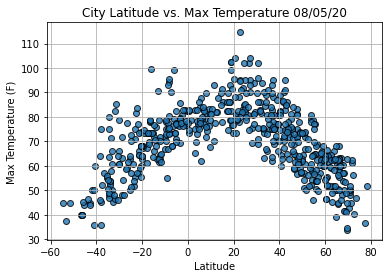

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

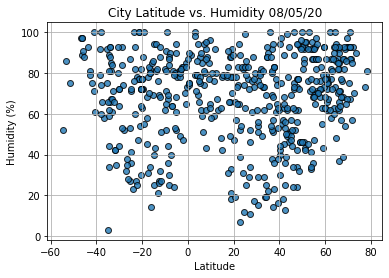

In [16]:
#(6.3.2) Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

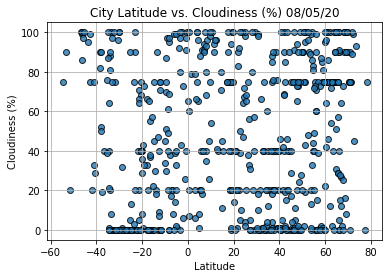

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

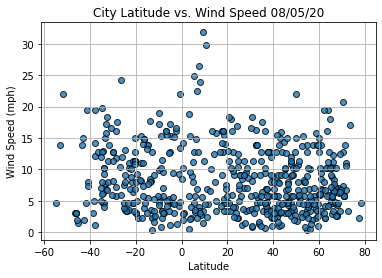

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(f"City Latitude vs. "+ y_label + " " + time.strftime("%x"))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

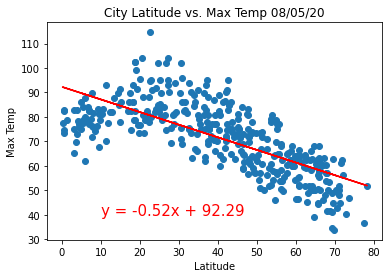

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,40))

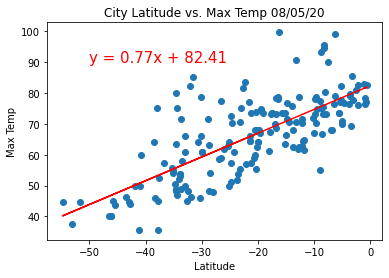

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

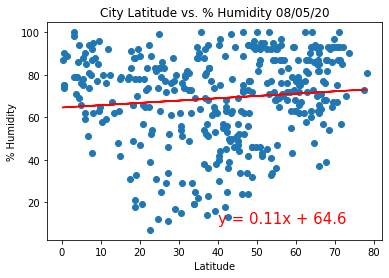

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

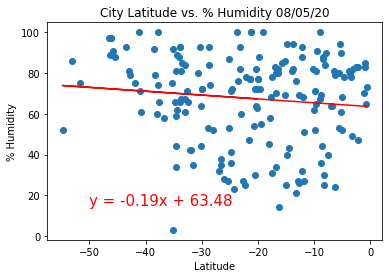

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [25]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Clyde River,CA,2020-08-05 17:48:09,70.47,-68.59,42.80,75,75,12.75
2,Kodiak,US,2020-08-05 17:48:09,57.79,-152.41,57.20,76,1,5.82
5,Jamestown,US,2020-08-05 17:43:14,42.10,-79.24,70.00,68,90,8.05
6,Thompson,CA,2020-08-05 17:46:18,55.74,-97.86,77.00,65,75,6.93
8,Severo-Kurilsk,RU,2020-08-05 17:48:10,50.68,156.12,50.76,92,100,10.71


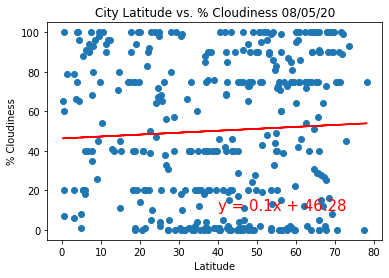

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

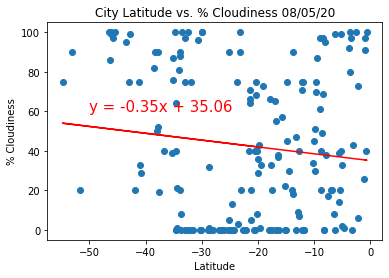

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

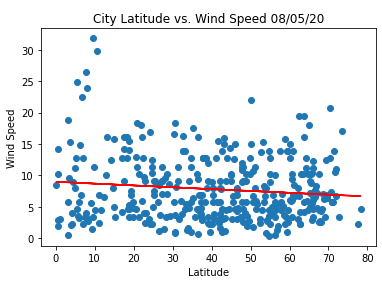

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

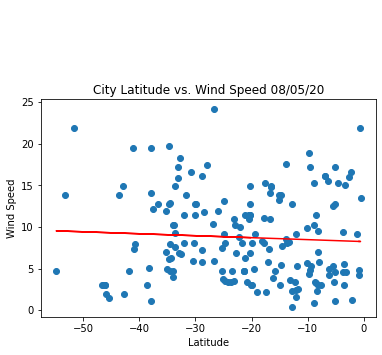

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))